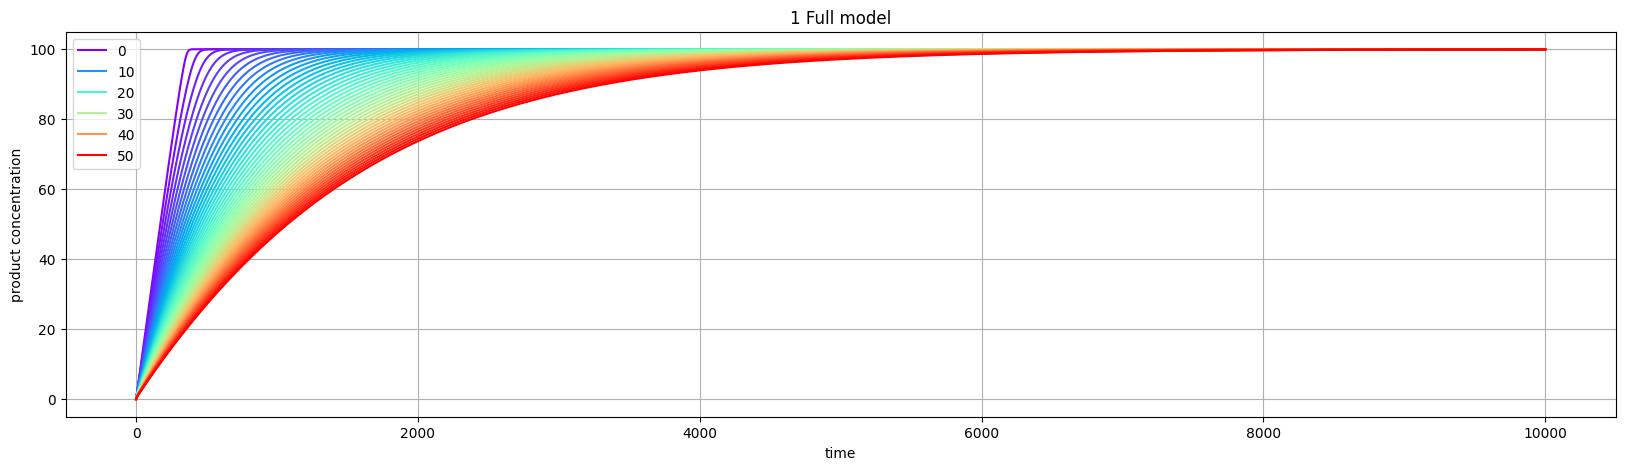

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
k1 = .2
k2 = .1
k3 = .3
k4 = .4
k5 = .1
def full(U, t) :
    s,p,e,i,c1,c2 = U
    ds = -k1*s*e+k2*c1
    dp = k3*c1
    de = (k2+k3)*c1-k1*s*e-k4*e*i+k5*c2
    di = k5*c2-k4*e*i
    dc1 = k1*s*e-(k2+k3)*c1
    dc2 = k4*e*i-k5*c2
    
    return ds, dp, de, di, dc1, dc2
    

colors = plt.cm.rainbow(np.linspace(0, 1, 51))
ts = np. linspace (0,10000, 10000)
FIG = plt.figure (figsize= (20,5))
for inhibitor, color in zip(range(0,51), colors):
    U0 = [100,0,1,inhibitor,0,0]
    Us = odeint(full, U0, ts)
    Ps = Us[:, 1]
    if inhibitor%10 == 0:
        label = inhibitor
    else: label = None
    plt.plot(ts, Ps, label = label, color = color) 
plt.grid()
plt.legend () 
plt.title('1 Full model')
plt.xlabel ('time')
plt.ylabel ('product concentration');

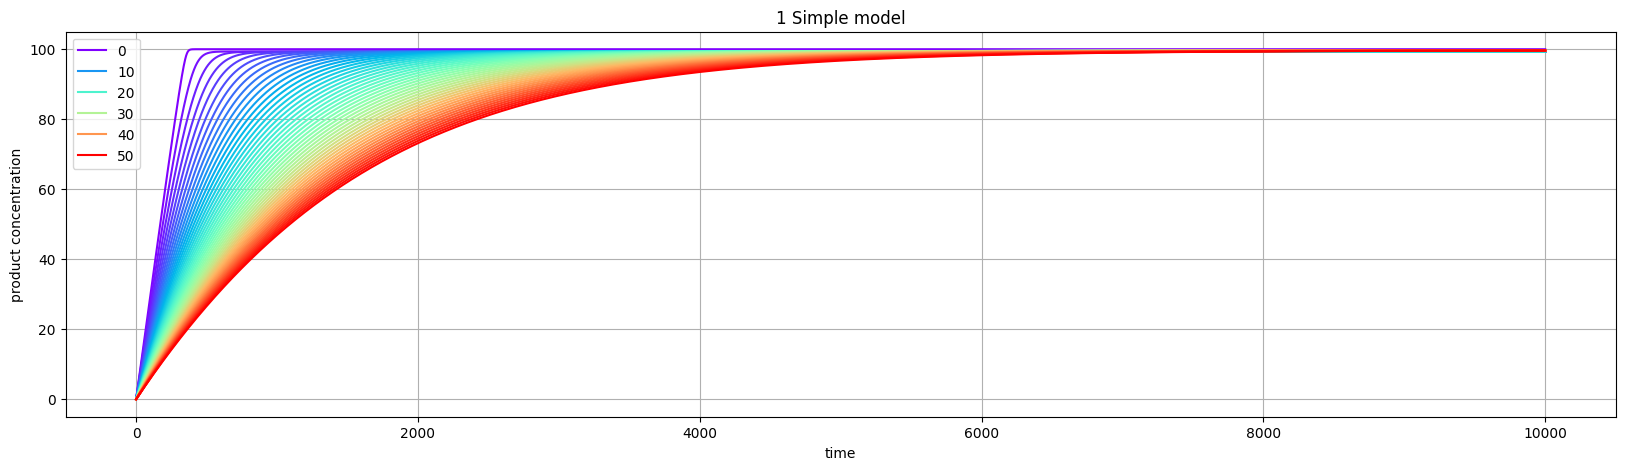

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
k1 = .2
k2 = .1
k3 = .3
k4 = .4
k5 = .1

KM = (k2+k3)/k1
KI = k5/k4
e0 = 1

def simple(U, t) :
    s,p,e,i = U
    c1 = (KI*e0*s)/(KM*i+KI*s+KM*KI)
    c2 = (KM*e0*i)/(KM*i+KI*s+KM*KI)
    ds = -k1*s*e+k2*c1
    dp = k3*c1
    de = (k2+k3)*c1-k1*s*e-k4*e*i+k5*c2
    di = k5*c2-k4*e*i
    return ds, dp, de, di
colors = plt.cm.rainbow(np.linspace(0, 1, 51))
ts = np. linspace (0, 10000, 10000)
FIG = plt.figure (figsize= (20,5))
for inhibitor, color in zip(range(0, 51), colors):
    U0 = [100,0,1,inhibitor]
    Us = odeint(simple, U0, ts)
    Ps = Us[:, 1]
    if inhibitor%10 == 0:
        label = inhibitor
    else: label = None
    plt.plot(ts, Ps, label = label, color = color) 
plt.grid()
plt.legend () 
plt.title('1 Simple model')
plt.xlabel ('time')
plt.ylabel ('product concentration');

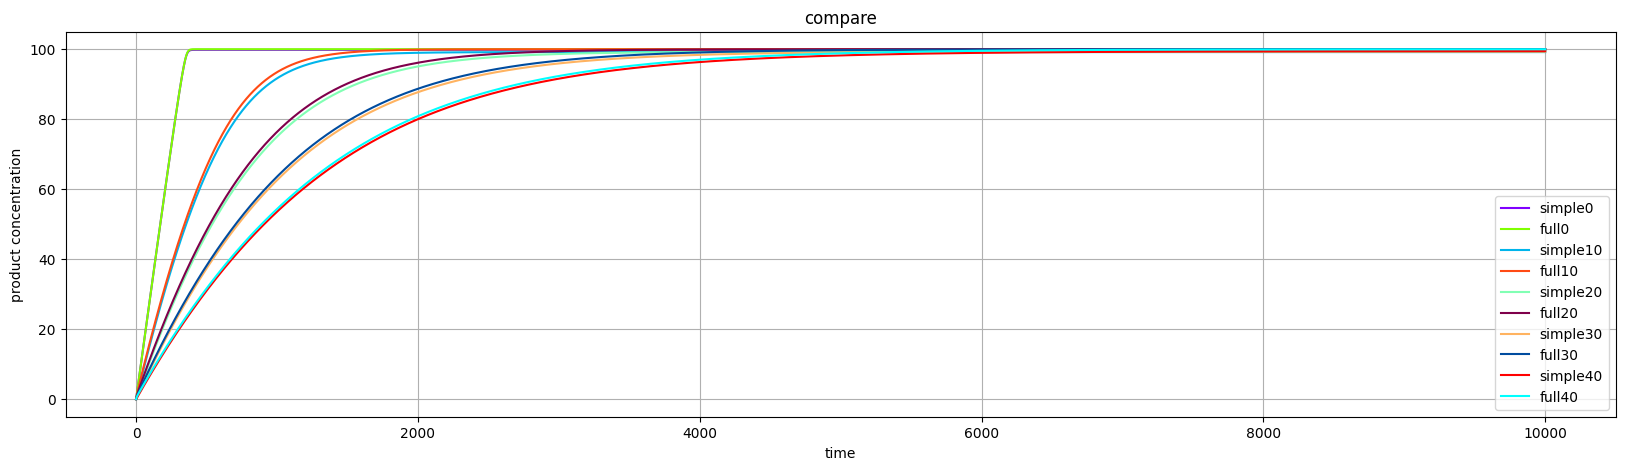

In [35]:

colors = plt.cm.rainbow(np.linspace(0, 1, 5))
ts = np. linspace (0, 10000, 10000)
FIG = plt.figure (figsize= (20,5))
for inhibitor, color in zip(range(0, 51, 10), colors):
    s = [100,0,1,inhibitor]
    f = [100,0,1,inhibitor,0,0]
    Simple = odeint(simple, s, ts)[:, 1]
    Full = odeint(full, f, ts)[:, 1]
    if inhibitor%10 == 0:
        label = inhibitor
    else: label = None
    plt.plot(ts, Simple, label = f'simple{inhibitor}', color = color)
    plt.plot(ts, Full, label = f'full{inhibitor}', color = 1 - color[:3]) # since there are 4-channels and last one is for transparency ; alpha channel
plt.grid()
plt.legend () 
plt.title('compare')
plt.xlabel ('time')
plt.ylabel ('product concentration');

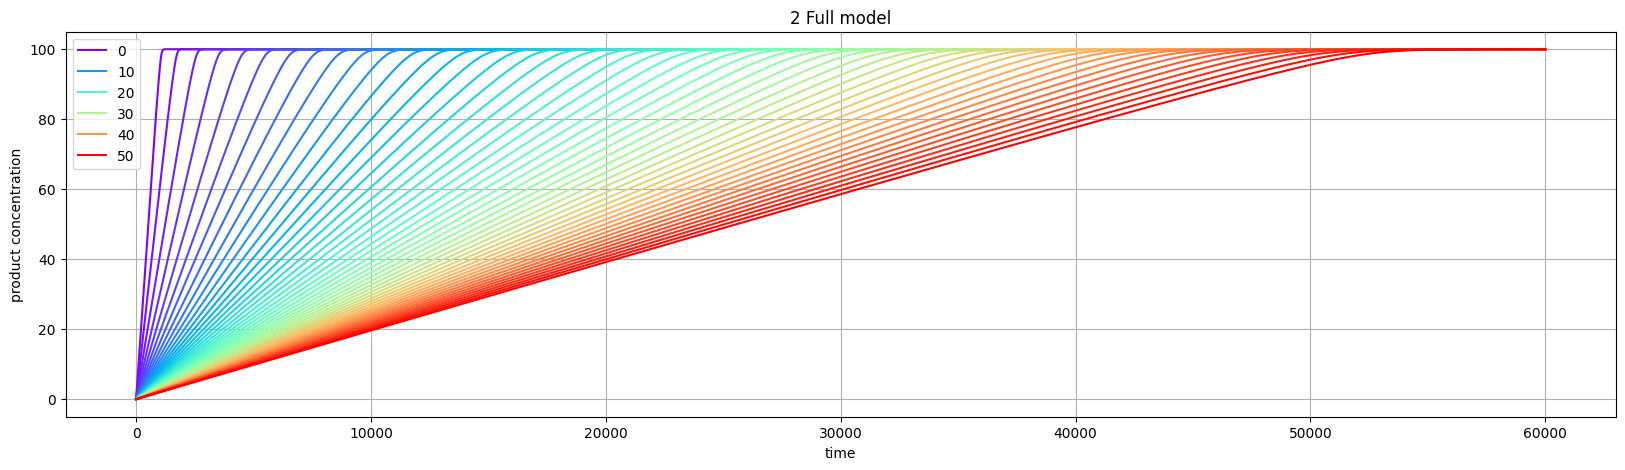

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
k1 = k_1 = k2 = k3 = k_3 = .1

def full(U,t):
    s,p,e,i,x,y,z = U
    ds = -k1*s*e + k_1*x - k1*s*y + k_1*z
    de = -k1*s*e + k_1*x - k3*e*i + k_3*y + k2*x
    dp = k2*x
    di = -k3*e*i + k_3*y - k3*x*i + k_3*z
    dx = k1*s*e - k_1*x - k2*x + k_3*z - k3*x*i
    dy = -k1*s*y + k_1*z - k_3*y + k3*e*i
    dz = k1*s*y - k_1*z + k3*x*i - k_3*z
    return ds, dp, de, di, dx, dy, dz
colors = plt.cm.rainbow(np.linspace(0, 1, 51))
ts = np. linspace (0,60000, 10000)
FIG = plt.figure (figsize= (20,5))
for inhibitor, color in zip(range(0,51), colors):
    U0 = [100,0,1,inhibitor,0,0,0]
    Us = odeint(full, U0, ts)
    Ps = Us[:, 1]
    if inhibitor%10 == 0:
        label = inhibitor
    else: label = None
    plt.plot(ts, Ps, label = label, color = color) 
plt.grid()
plt.legend () 
plt.title('2 Full model')
plt.xlabel ('time')
plt.ylabel ('product concentration');

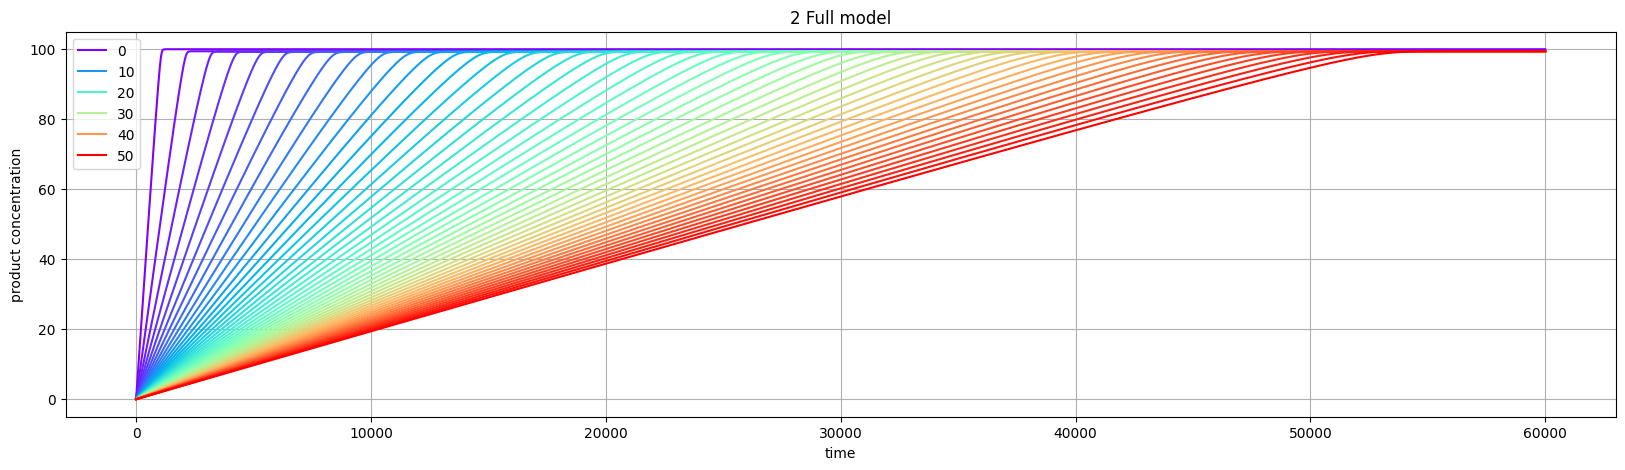

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
k1 = k_1 = k2 = k3 = k_3 = .1
e0 = 1
def simple(U,t):
    s,p,e,i = U
    x = (2*e0*s + e0*s**2 + e0*i*s) / (i**2*s + i**2 + i*s**2 + 5*i*s + 5*i + s**2 + 4*s + 4)
    y = (e0*i*(i+s+4)) / (i**2*s + i**2 + i*s**2 + 5*i*s + 5*i + s**2 + 4*s + 4)
    z= (e0*i*s*(i+s+3)) / (i**2*s + i**2 + i*s**2 + 5*i*s + 5*i + s**2 + 4*s + 4)
    ds = -k1*s*e + k_1*x - k1*s*y + k_1*z
    dp = k2*x
    de = -k1*s*e + k_1*x - k3*e*i + k_3*y + k2*x
    di = -k3*e*i + k_3*y - k3*x*i + k_3*z
    return ds, dp, de, di
colors = plt.cm.rainbow(np.linspace(0, 1, 51))
ts = np. linspace (0,60000, 10000)
FIG = plt.figure (figsize= (20,5))
for inhibitor, color in zip(range(0,51), colors):
    U0 = [100,0,1,inhibitor]
    Us = odeint(simple, U0, ts)
    Ps = Us[:, 1]
    if inhibitor%10 == 0:
        label = inhibitor
    else: label = None
    plt.plot(ts, Ps, label = label, color = color) 
plt.grid()
plt.legend () 
plt.title('2 Full model')
plt.xlabel ('time')
plt.ylabel ('product concentration');

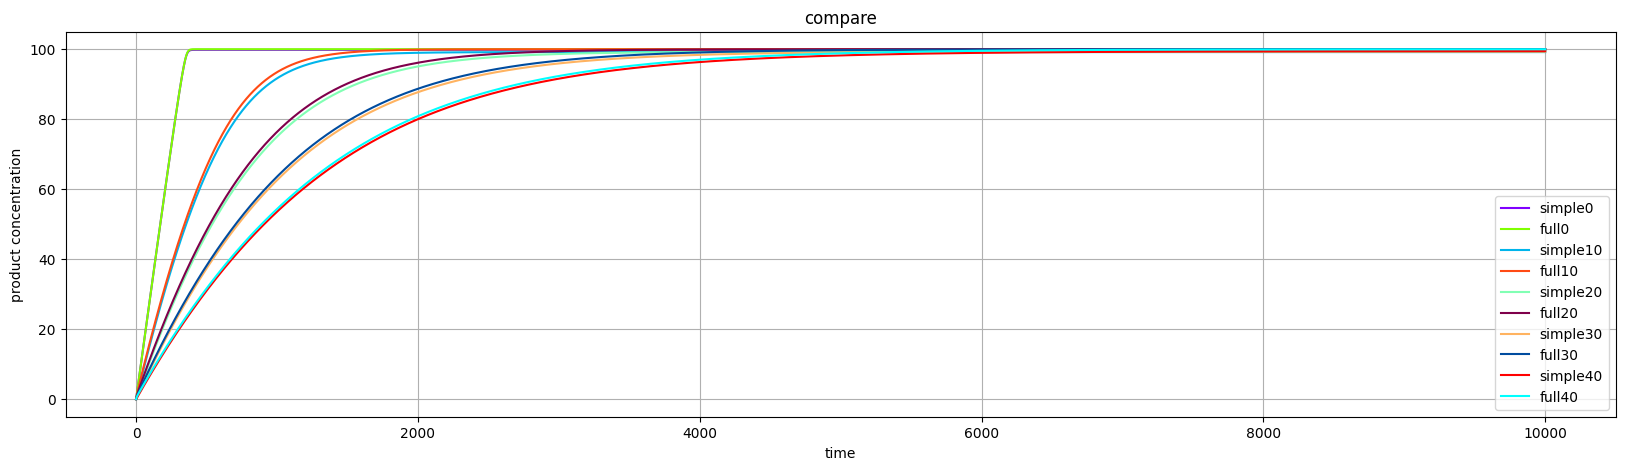

In [36]:

colors = plt.cm.rainbow(np.linspace(0, 1, 5))
ts = np. linspace (0, 10000, 10000)
FIG = plt.figure (figsize= (20,5))
for inhibitor, color in zip(range(0, 51, 10), colors):
    s = [100,0,1,inhibitor]
    f = [100,0,1,inhibitor,0,0]
    Simple = odeint(simple, s, ts)[:, 1]
    Full = odeint(full, f, ts)[:, 1]
    if inhibitor%10 == 0:
        label = inhibitor
    else: label = None
    plt.plot(ts, Simple, label = f'simple{inhibitor}', color = color)
    plt.plot(ts, Full, label = f'full{inhibitor}', color = 1 - color[:3]) 
plt.grid()
plt.legend () 
plt.title('compare')
plt.xlabel ('time')
plt.ylabel ('product concentration');